In [1]:
import fermi.tipsh as tipsh
from fermi.skymap import imshow_mollweide
from astropy.wcs import WCS
from astropy.visualization.wcsaxes import WCSAxes
from astropy.io import fits
from astropy.utils.data import get_pkg_data_filename
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import cartopy.crs as ccrs
from scipy.ndimage import gaussian_filter
import numpy
import math
import fermi.rl as rl
import time

In [2]:
energy = '10-20gev'
fits_root = 'fits_files'
date = '2022-01-16'
fwer = 'sidak'
alpha = 0.01
mode = 'pvalue'

In [3]:
#tic = time.time()
#a, hs, vs, ds = tipsh.haar_threshold_sphere(count_data, total_model, 0.01, 0, fwer='sidak')
#toc = time.time()
#print("Elapsed", toc - tic)
tmp = numpy.load(f"{date}_{energy}_{fwer}_{alpha}_{mode}.npz")
a = tmp['a']
hs = tmp['hs']
vs = tmp['vs']
ds = tmp['ds']
total_model = tmp['total_model']

In [4]:
data_file = get_pkg_data_filename(f"{fits_root}/lat_source_zmax90_{energy}_ccube.fits")
point_model_file = get_pkg_data_filename(f"{fits_root}/{energy}_source_point_model_map.fits")
diffuse_model_file = get_pkg_data_filename(f"{fits_root}/{energy}_source_diffuse_model_map.fits")
galactic_model_file = get_pkg_data_filename(f"{fits_root}/{energy}_source_galactic_v02_model_map.fits")
isotropic_model_file = get_pkg_data_filename(f"{fits_root}/{energy}_source_isotropic_model_map.fits")
exp_file = get_pkg_data_filename(f"{fits_root}/lat_source_zmax90_{energy}_expcube.fits")

In [5]:
count_cube = fits.getdata(data_file, ext=0)
count_data = count_cube[0]
point_model = fits.getdata(point_model_file, ext=0)
diffuse_model = fits.getdata(diffuse_model_file, ext=0)
galactic_model = fits.getdata(galactic_model_file, ext=0)
isotropic_model = fits.getdata(isotropic_model_file, ext=0)
exp_cube = fits.getdata(exp_file, ext=0)
exposure = exp_cube[0]

In [4]:
dnorm = sum(sum(diffuse_model))
d = diffuse_model/dnorm
pnorm = sum(sum(point_model))
p = point_model/pnorm
gnorm = sum(sum(galactic_model))
g = galactic_model/gnorm
inorm = sum(sum(isotropic_model))
iso = isotropic_model/inorm

In [5]:
z0 = [dnorm, pnorm, gnorm, inorm]
psfs = [d, p, g, iso]
zk = z0

In [6]:
zk = rl.rl1(psfs, zk, count_data)
[i / j for i,j in zip(zk, z0)]

[0.9385084846799586,
 0.9499391766559807,
 0.9349412297486219,
 0.9445335421645259]

In [7]:
#def fz(z):
#    return loss(psfs, z, count_data, d2_loss_map)
#zknm = minimize(fz, zk, method='Nelder-Mead')

In [8]:
im0 = rl.image_conv(zk, psfs)
total_model = im0

(<Figure size 2160x1080 with 2 Axes>, <GeoAxesSubplot:>)

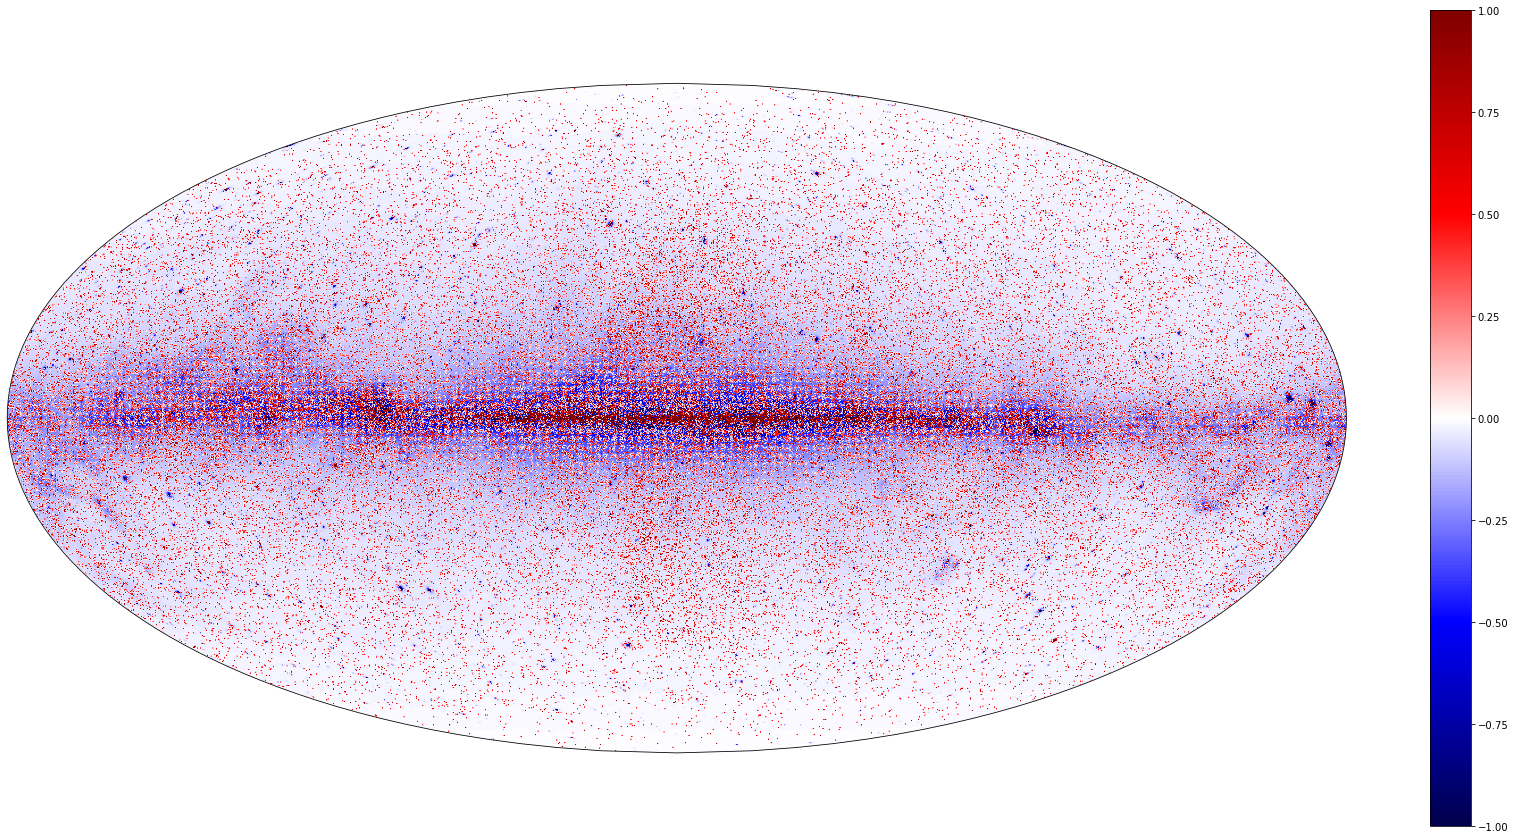

In [16]:
#tm = numpy.add(numpy.add(numpy.add(1.0*point_model, 1.0*diffuse_model), 1.0*galactic_model), 1.0*isotropic_model)
imshow_mollweide(numpy.subtract(count_data, total_model), plt.cm.seismic, colors.Normalize(vmin=-1e-0,vmax=1e0))

(<Figure size 2160x1080 with 2 Axes>, <GeoAxesSubplot:>)

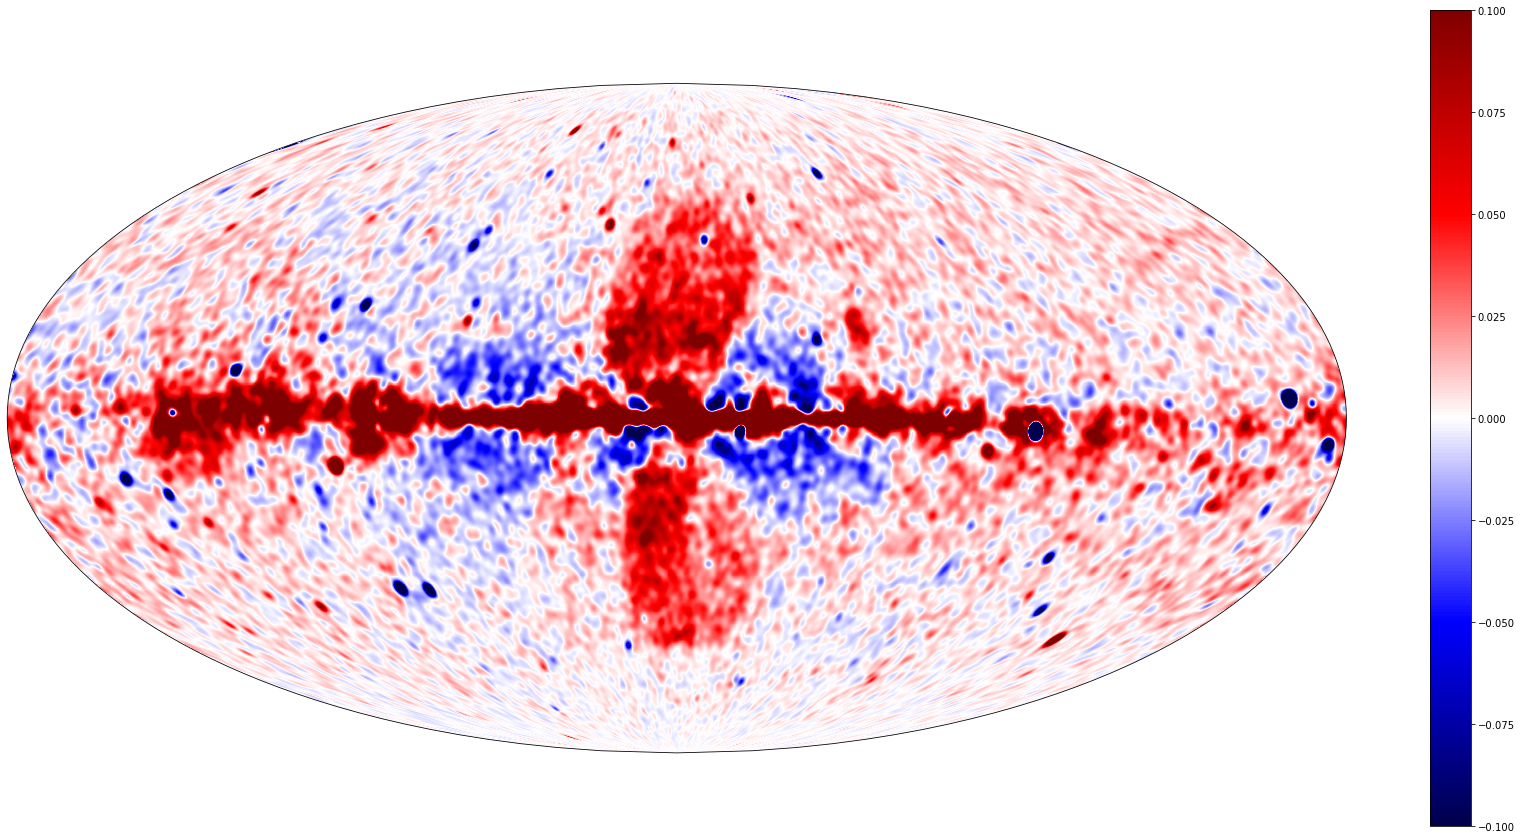

In [17]:
numpy.add(numpy.add(numpy.add(1.0*point_model, 1.0*diffuse_model), 1.0*galactic_model), 1.0*isotropic_model)
imshow_mollweide(gaussian_filter(numpy.subtract(count_data, total_model), 8.45), plt.cm.seismic, colors.Normalize(vmin=-0.1,vmax=0.1))

In [11]:
fig.savefig("nasa_10_20_GeV_fwhm_2deg.png")

R[write to console]: There were 50 or more warnings (use warnings() to see the first 50)
R[write to console]: 



In [13]:
# Run one iteration and write a profile stats file.
# make visualization with "make dot"

#import cProfile
#cProfile.run("tipsh.haar_threshold_sphere(count_data, total_model, 0.001, 11, fwer='uniform')", filename="fermi.pstats")

In [6]:
count_rec = tipsh.inv_haar_sphere(a, hs, vs, ds)
#print(sum(sum(count_data)), sum(sum(total_model)), sum(sum(count_rec)))

(<Figure size 2160x1080 with 2 Axes>, <GeoAxesSubplot:>)

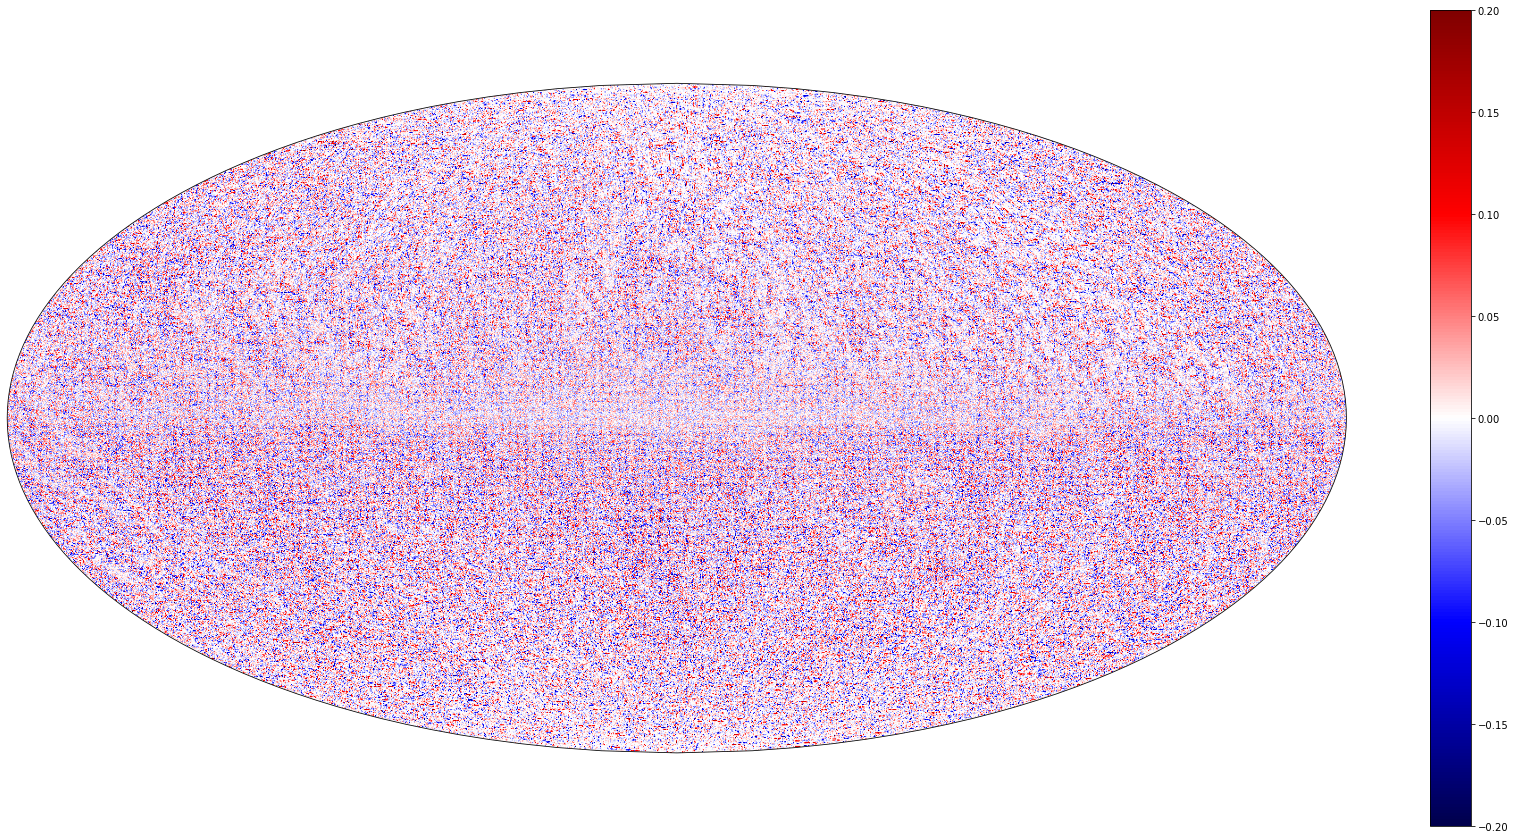

In [7]:
imshow_mollweide(count_rec, plt.cm.seismic, colors.Normalize(vmin=-2e-1,vmax=2e-1))

In [18]:
rlev = tipsh.inv_haar_level(7, a, hs, vs, ds)

(<Figure size 2160x1080 with 2 Axes>, <GeoAxesSubplot:>)

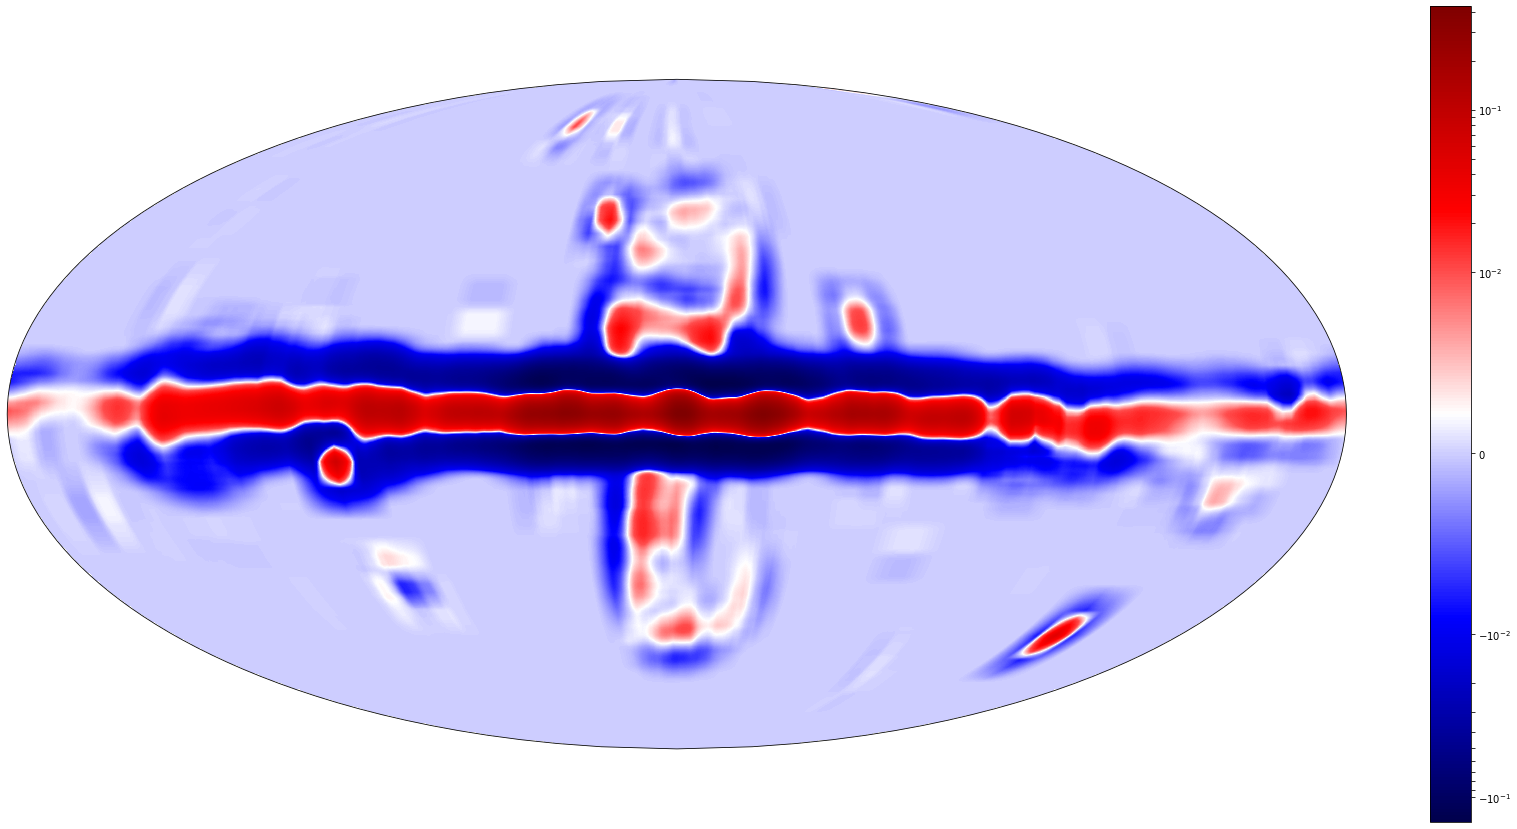

In [19]:
imshow_mollweide(rlev, plt.cm.seismic, colors.SymLogNorm(linthresh=1e-2))

/home/dave/anaconda3/envs/fermi/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until


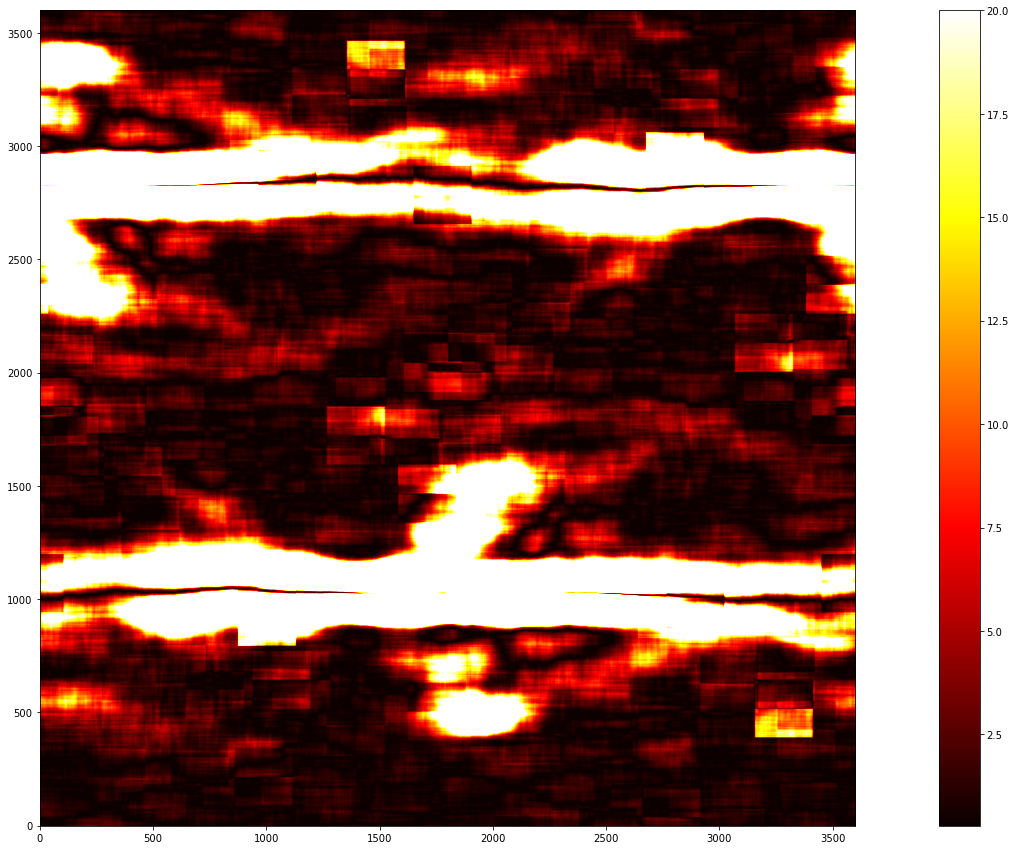

In [40]:
fig = plt.figure(figsize=(30, 15))
ax = plt.subplot()
foo = plt.imshow(-numpy.log10(vs[7]), cmap=plt.cm.hot, norm=colors.Normalize(vmax=20), origin='lower')
plt.colorbar(foo)

In [9]:
fig.savefig("2022-01-03_10_20_GeV_sidak_01.png")

In [25]:
lon = numpy.arange(-180, 180, 0.1)
lat = numpy.arange(-90, 90, 0.1)
Lat, Lon = numpy.meshgrid(lon, lat)
levels = numpy.arange(-0.1, 0.1, 0.01)

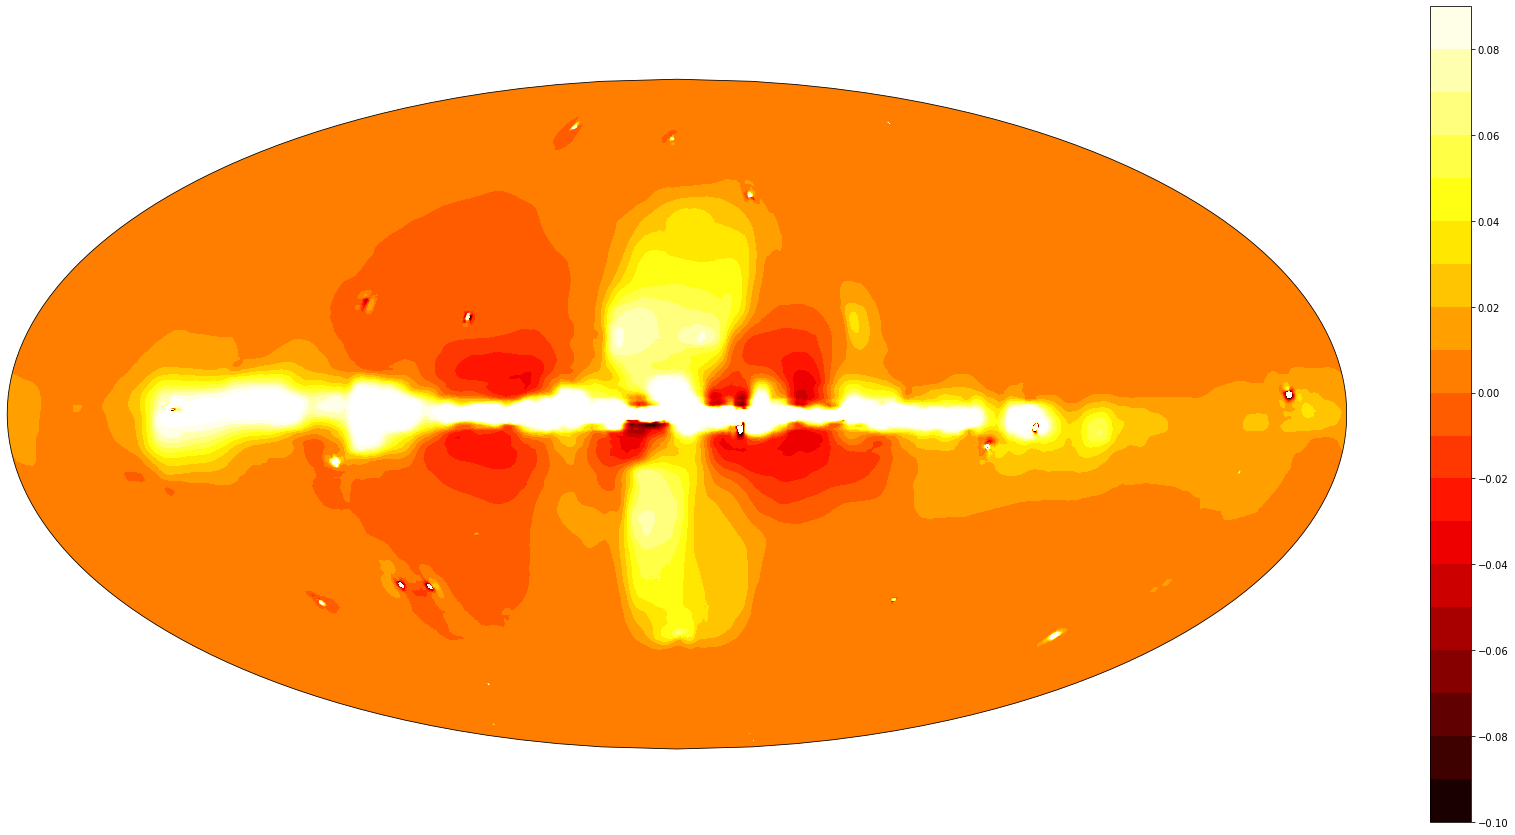

In [26]:
fig = plt.figure(figsize=(30, 15))
ax = plt.subplot(projection=ccrs.Mollweide())
foo = plt.contourf(Lat, Lon, numpy.subtract(count_rec, total_model), levels, cmap=plt.cm.hot, linewidths=0.3, transform=ccrs.PlateCarree())
plt.colorbar(foo)

(array([5.979595e+06, 4.140870e+05, 7.005200e+04, 9.642000e+03,
        3.416000e+03, 1.417000e+03, 1.102000e+03, 2.700000e+02,
        1.220000e+02, 2.070000e+02, 4.100000e+01, 1.000000e+01]),
 array([  0,   1,   2,   4,   6,   8,  10,  15,  20,  25,  50,  75, 100]),
 <BarContainer object of 12 artists>)

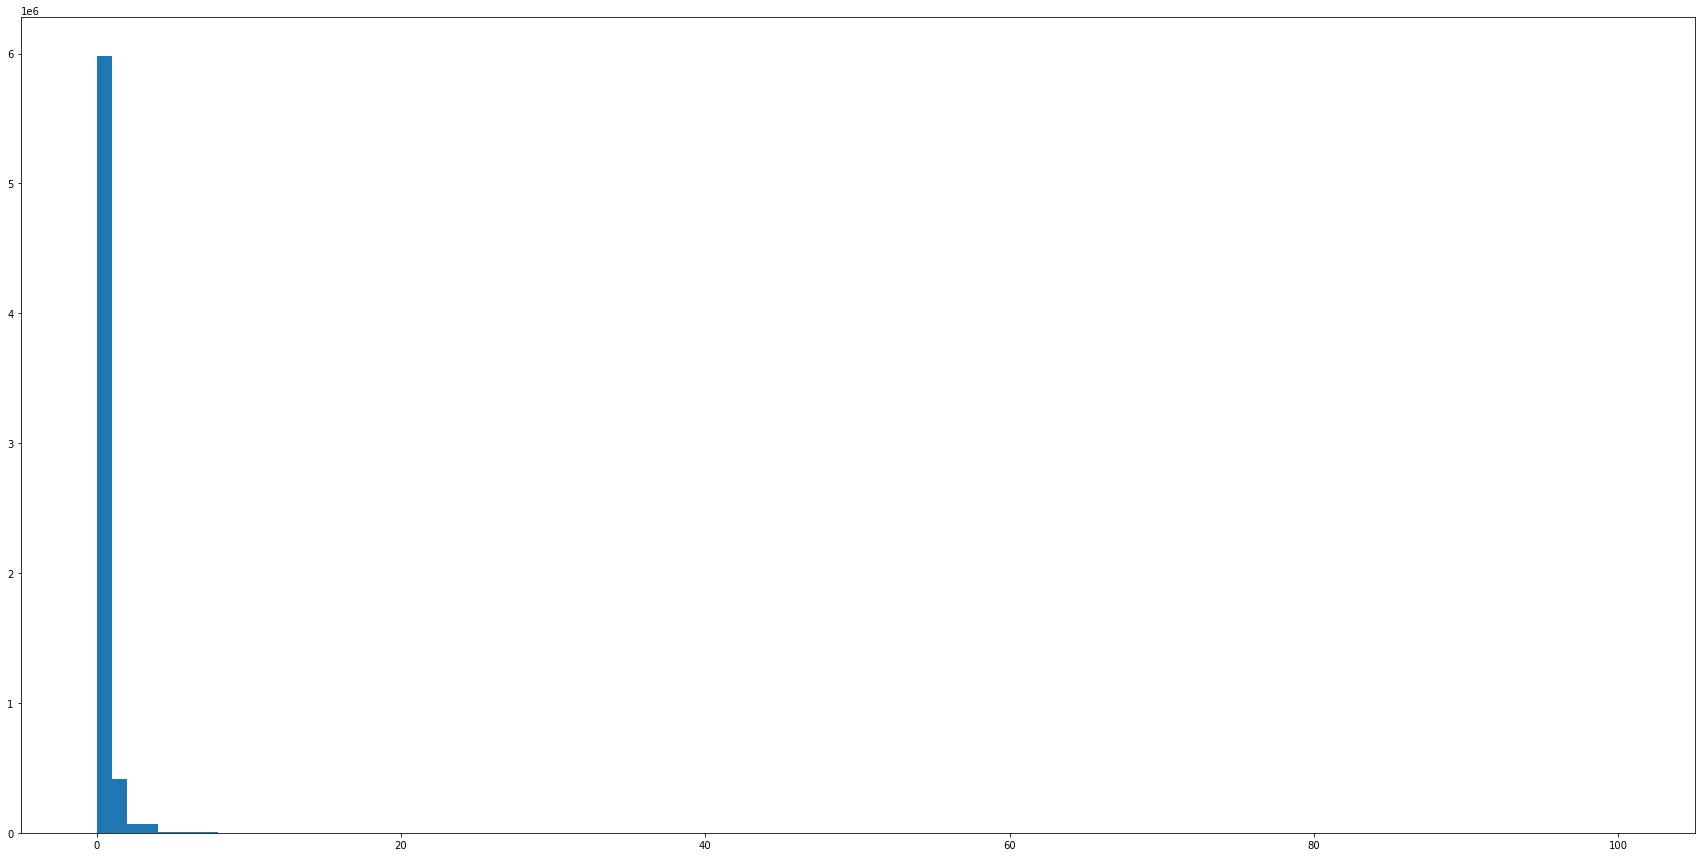

In [50]:
fig = plt.figure(figsize=(30, 15))
plt.hist(count_data.flat, bins=[0,1,2,4,6,8,10,15,20,25,50,75,100])

In [2]:
def zero(n):
    return numpy.zeros((n,n), float)

def checkers(n, p):
    arr = numpy.zeros((n, 2*n), float) + 2
    for row in range(n):
        rq, rr = divmod(row, p)
        row_mult = 1 if rq % 2 == 0 else -1
        for col in range(2*n):
            cq, cr = divmod(col, p)
            col_mult = 1 if cq % 2 == 0 else -1
            arr[row,col] += row_mult*col_mult
    return arr

def delta(n, row, col):
    arr = numpy.zeros((n, 2*n), float) 
    arr[row, col] = 1
    return arr

def stripe(n, rows):
    arr = numpy.zeros((n, 2*n), float) 
    arr[rows, :] = 1
    return arr

In [3]:
#total_model = stripe(30, [13,14,15])*10 + 1
#data_model = 0.225*count_model #+ stripe(30, [13,14,15])*10 #+ 20*delta(30, 15, 15)
#count_data = poisson.rvs(data_model)
#a_model, hs_model, vs_model, ds_model = haar(count_model)
#a_data, hs_data, vs_data, ds_data = haar(count_data)